# crime data

In [ ]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
crime=pd.read_csv("crime_data.csv")

In [ ]:
crime.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


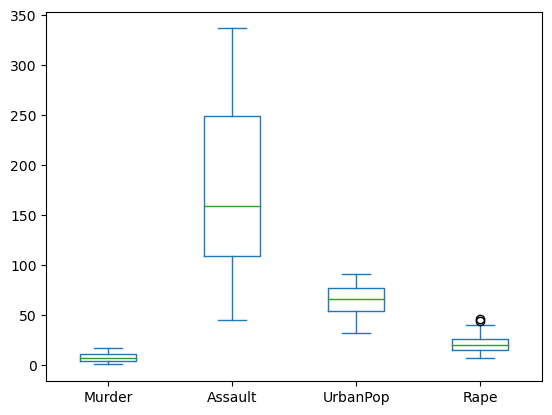

In [ ]:
crime.plot(kind='box')
plt.show()


In [ ]:
crime.shape

(50, 5)

# normalization

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:

crime_norm = norm_func(crime.iloc[:,1:])

In [ ]:
crime_norm.head()

Murder   Assault  UrbanPop      Rape
0  0.746988  0.654110  0.440678  0.359173
1  0.554217  0.746575  0.271186  0.961240
2  0.439759  0.852740  0.813559  0.612403
3  0.481928  0.496575  0.305085  0.315245
4  0.493976  0.791096  1.000000  0.860465

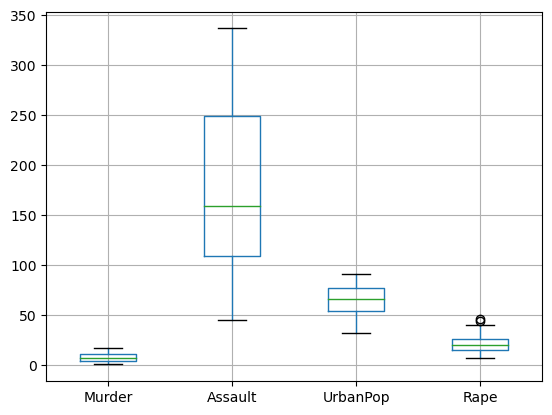

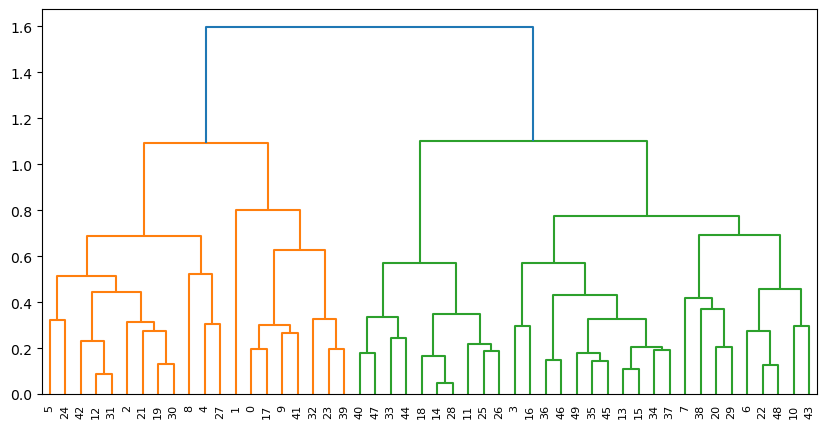

In [ ]:

plt.figure(figsize=(10, 5)) 
dendrogram=sch.dendrogram(sch.linkage(crime_norm, method='complete'))
plt.show()

# Hierarchical clustering

In [ ]:
h_crime=crime.copy()

In [ ]:
h_crime_norm=crime_norm.copy()

In [ ]:
h_cluster=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage='complete')

In [ ]:
h_cluster

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [ ]:
y_hc=h_cluster.fit_predict(h_crime_norm)

In [ ]:
h_crime_norm["hclusterid"]=y_hc

In [ ]:
h_crime_norm.head()

Murder   Assault  UrbanPop      Rape  hclusterid
0  0.746988  0.654110  0.440678  0.359173           0
1  0.554217  0.746575  0.271186  0.961240           0
2  0.439759  0.852740  0.813559  0.612403           3
3  0.481928  0.496575  0.305085  0.315245           1
4  0.493976  0.791096  1.000000  0.860465           3

In [ ]:
h_crime_norm['hclusterid'].value_counts()

1    20
3    12
2    10
0     8
Name: hclusterid, dtype: int64

In [ ]:
h_crime['hclusterid']=h_cluster.labels_

In [ ]:
h_crime.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape  hclusterid
0     Alabama    13.2      236        58  21.2           0
1      Alaska    10.0      263        48  44.5           0
2     Arizona     8.1      294        80  31.0           3
3    Arkansas     8.8      190        50  19.5           1
4  California     9.0      276        91  40.6           3

In [ ]:
h_crime_norm.groupby(["hclusterid"]).agg(['mean']).reset_index()

hclusterid    Murder   Assault  UrbanPop      Rape
                  mean      mean      mean      mean
0          0  0.800452  0.711473  0.364407  0.445413
1          1  0.296084  0.298973  0.657627  0.279070
2          2  0.143373  0.115411  0.293220  0.111886
3          3  0.607430  0.725742  0.785311  0.644703

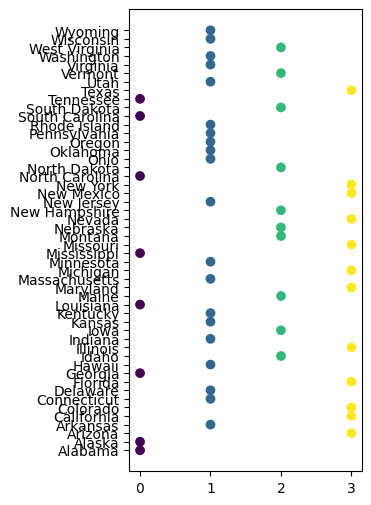

In [ ]:
plt.figure(figsize=(3,6))  
plt.scatter(h_crime['hclusterid'],h_crime['Unnamed: 0'], c=h_cluster.labels_) 
plt.show()

# K-means

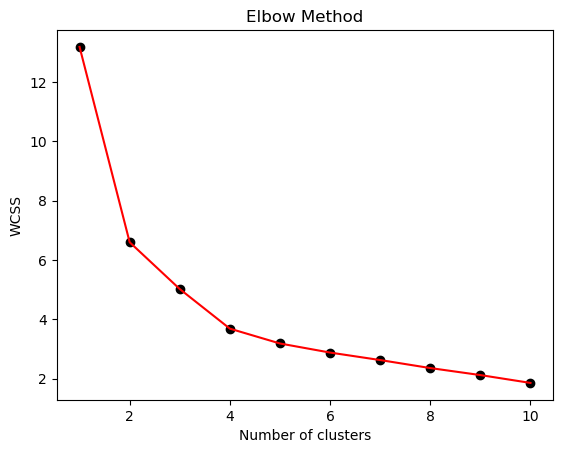

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,color='red')
plt.scatter(range(1, 11), wcss,color='black')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
K4_crime_norm=crime_norm.copy()

In [ ]:
K4_cluster=KMeans(n_clusters=4)
K4_cluster.fit(K4_crime_norm)

KMeans(n_clusters=4)

In [ ]:
K4_cluster.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [ ]:
K4_crime=crime.copy()

In [ ]:
K4_crime['K4_clusterid']=K4_cluster.labels_

In [ ]:
K4_crime.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape  K4_clusterid
0     Alabama    13.2      236        58  21.2             3
1      Alaska    10.0      263        48  44.5             1
2     Arizona     8.1      294        80  31.0             1
3    Arkansas     8.8      190        50  19.5             3
4  California     9.0      276        91  40.6             1

In [ ]:
K4_crime.groupby(["K4_clusterid"])["Unnamed: 0"].apply(lambda x : tuple(x))

K4_clusterid
0    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
3    (Alabama, Arkansas, Georgia, Louisiana, Missis...
Name: Unnamed: 0, dtype: object

In [ ]:
K4_crime['K4_clusterid'].value_counts()

0    16
1    13
2    13
3     8
Name: K4_clusterid, dtype: int64

In [ ]:
K4_cluster.cluster_centers_

array([[0.29254518, 0.32148973, 0.70974576, 0.29667313],
       [0.60333642, 0.72734457, 0.74576271, 0.66905188],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [ ]:
K4_crime.groupby('K4_clusterid').agg(['mean']).reset_index()

K4_clusterid     Murder     Assault   UrbanPop       Rape
                     mean        mean       mean       mean
0            0   5.656250  138.875000  73.875000  18.781250
1            1  10.815385  257.384615  76.000000  33.192308
2            2   3.600000   78.538462  52.076923  12.176923
3            3  13.937500  243.625000  53.750000  21.412500

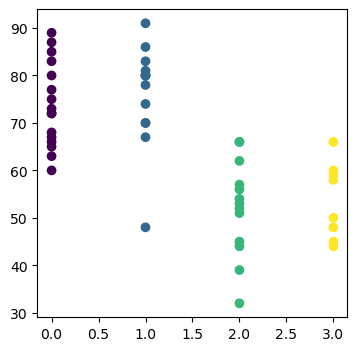

In [ ]:
plt.figure(figsize=(4, 4))  
plt.scatter(K4_crime['K4_clusterid'],K4_crime['UrbanPop'], c=K4_cluster.labels_) 
plt.show()

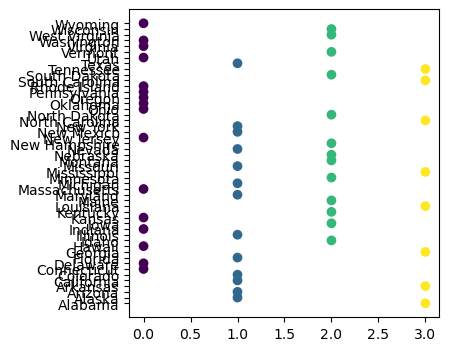

In [ ]:
plt.figure(figsize=(4, 4))  
plt.scatter(K4_crime['K4_clusterid'],K4_crime['Unnamed: 0'], c=K4_cluster.labels_) 
plt.show()

# DBSCAN

In [ ]:
db_crime=crime.copy()

In [ ]:
db_crime_norm=crime_norm.copy()

In [ ]:
dbscan=DBSCAN(eps=0.2,min_samples=3)
dbscan.fit(db_crime_norm)

DBSCAN(eps=0.2, min_samples=3)

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0],
      dtype=int64)

In [ ]:
db_crime['db_clusterid']=dbscan.labels_
db_crime.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape  db_clusterid
0     Alabama    13.2      236        58  21.2            -1
1      Alaska    10.0      263        48  44.5            -1
2     Arizona     8.1      294        80  31.0            -1
3    Arkansas     8.8      190        50  19.5            -1
4  California     9.0      276        91  40.6            -1

In [ ]:
db_crime.groupby('db_clusterid').agg(['mean']).reset_index()

db_clusterid     Murder     Assault   UrbanPop       Rape
                     mean        mean       mean       mean
0           -1   9.957692  211.076923  68.615385  24.069231
1            0   4.644444   99.222222  59.000000  14.577778
2            1  11.600000  280.000000  70.333333  31.666667
3            2   4.033333  141.333333  73.333333  26.133333

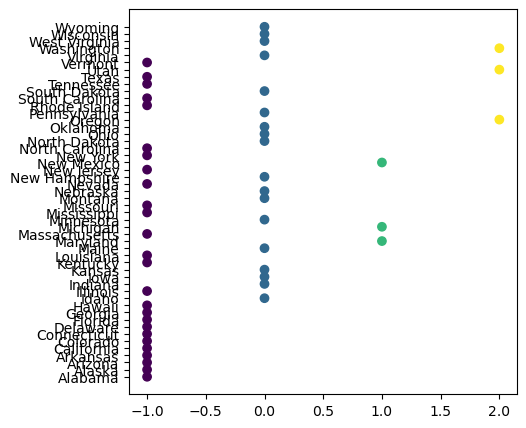

In [ ]:
plt.figure(figsize=(5, 5))  
plt.scatter(db_crime['db_clusterid'],db_crime['Unnamed: 0'], c=dbscan.labels_) 
plt.show()

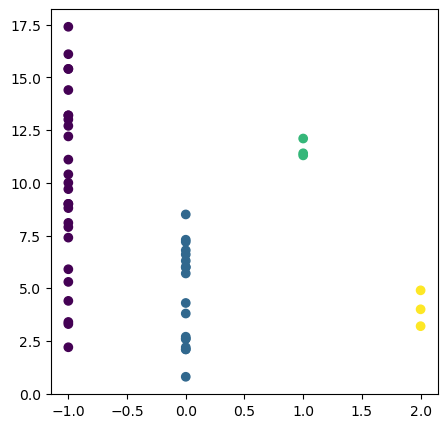

In [ ]:
plt.figure(figsize=(5, 5))  
plt.scatter(db_crime['db_clusterid'],db_crime['Murder'], c=dbscan.labels_) 
plt.show()